In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
# import kaggle
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("./public/NHANES.csv")

In [3]:
# SEQN = Respondent sequence number (
# SMQ020 = Smoking
# RIAGENDR = Gender
# RIDAGEYR = Age (years)
# DMDEDUC2 = Education level
# BMXWT = Weight (kg)
# BMXHT = Height (cm)
# BMXBMI = BMI

In [4]:
df.head(5)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
df.describe().round(2)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.00,5208.00,1731.00,3379.00,5735.00,5735.00,5735.00,5735.00,5734.00,5474.00,...,5535.00,5535.00,5666.00,5673.00,5662.00,5345.00,5427.00,5427.00,5368.00,4732.00
mean,88678.58,1.34,1.59,3.91,1.61,1.52,48.05,3.04,1.19,3.44,...,124.78,69.35,81.34,166.14,29.38,38.58,37.15,33.11,99.57,1.92
std,2882.14,0.51,0.62,34.34,0.57,0.50,18.43,1.30,0.49,1.31,...,18.53,13.02,21.76,10.08,7.10,3.87,2.80,5.27,16.84,0.41
min,83732.00,1.00,1.00,1.00,1.00,1.00,18.00,1.00,1.00,1.00,...,84.00,0.00,32.40,129.70,14.50,26.00,28.20,17.10,58.70,1.00
25%,86164.00,1.00,1.00,1.00,1.00,1.00,32.00,2.00,1.00,3.00,...,112.00,62.00,65.90,158.70,24.30,36.00,35.20,29.50,87.60,2.00
50%,88668.00,1.00,2.00,2.00,2.00,2.00,48.00,3.00,1.00,4.00,...,122.00,70.00,78.20,166.00,28.30,38.60,37.10,32.70,98.30,2.00
75%,91178.50,2.00,2.00,3.00,2.00,2.00,63.00,4.00,1.00,4.75,...,134.00,78.00,92.70,173.50,33.00,41.20,39.00,36.20,109.30,2.00
max,93702.00,9.00,9.00,999.00,9.00,2.00,80.00,5.00,9.00,9.00,...,238.00,144.00,198.90,202.70,67.30,51.50,47.40,58.40,171.60,9.00


In [6]:
df.shape[0]

5735

In [7]:
df.isna().sum()

df["ALQ110"] = df["ALQ110"].fillna(value=np.mean(df["ALQ110"]))

df["ALQ110"].describe()

count    5735.000000
mean        1.587522
std         0.342718
min         1.000000
25%         1.587522
50%         1.587522
75%         1.587522
max         9.000000
Name: ALQ110, dtype: float64

In [8]:
data = df.loc[:, ['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']]
data.head(5)

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [9]:
data.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']
data.head(5)

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [10]:
data.shape[0]

5735

In [11]:
data_dupes = data[data.duplicated()]
data_dupes

data.drop(columns=["seqn"], inplace=True)

In [12]:
data.isna().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isna().sum()
data.shape

(5406, 7)

In [15]:
num_list = data.select_dtypes(include=["float64", "int32", "int64"]).columns.tolist()
num_list

['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']

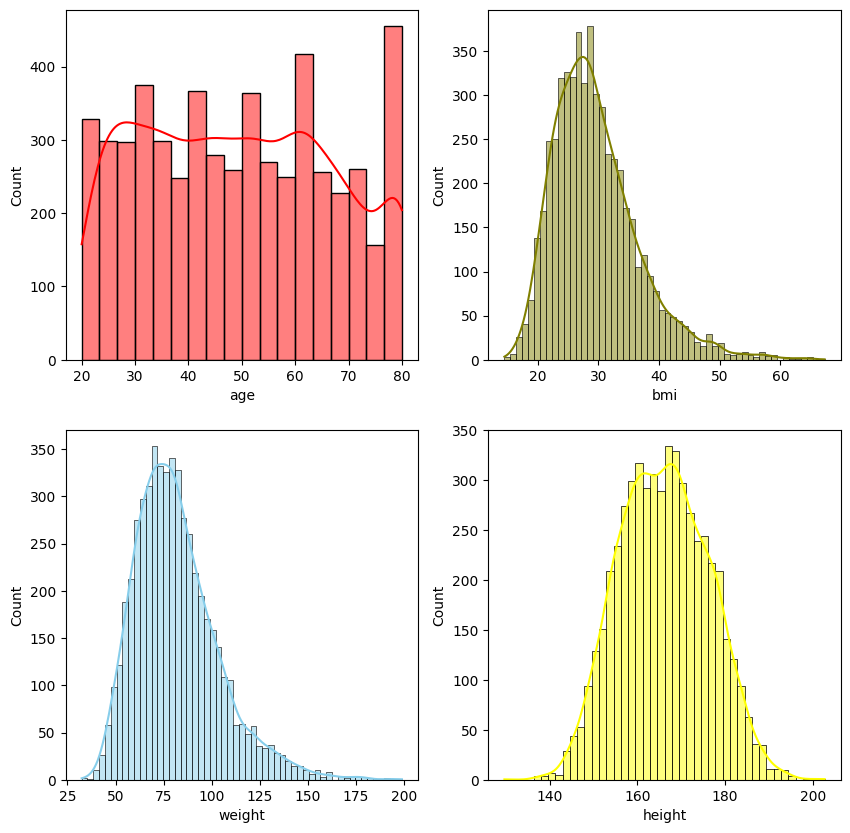

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sns.histplot(data=data, x='age', color="red", kde=True, ax=axs[0,0])
sns.histplot(data=data, x='bmi', color="olive", kde=True, ax=axs[0,1])
sns.histplot(data=data, x='weight', color="skyblue", kde=True, ax=axs[1,0])
sns.histplot(data=data, x='height', color="yellow", kde=True, ax=axs[1,1])

plt.show()

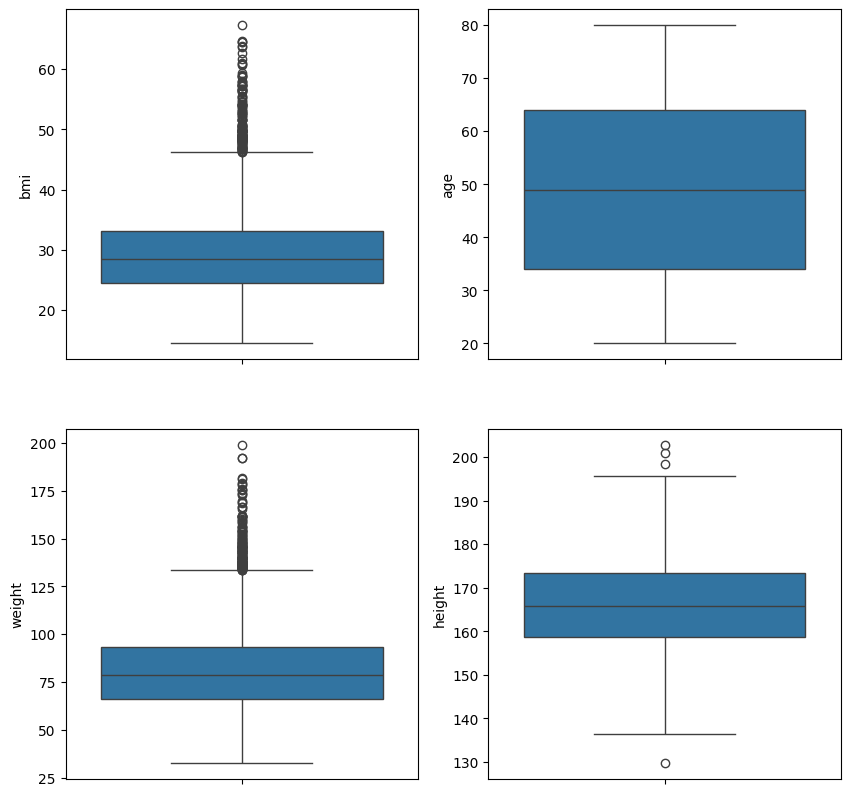

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sns.boxplot(data["bmi"], ax=axs[0,0])
sns.boxplot(data["age"], ax=axs[0,1])
sns.boxplot(data["weight"], ax=axs[1,0])
sns.boxplot(data["height"], ax=axs[1,1])

plt.show()

1.0101361909545072
0.20419212205952614


<Axes: xlabel='weight', ylabel='Count'>

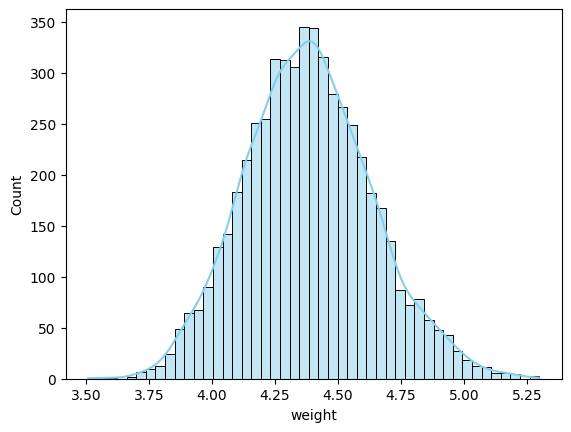

In [18]:
print(data.weight.skew())

print(np.log1p(data.weight).skew())

sns.histplot(data=np.log1p(data), x='weight', color="skyblue", kde=True)

In [19]:
qh25, qh50, qh75 = np.percentile(data["height"], [25, 50, 75])

iqr = qh75 - qh25
print(iqr.round(2))
minh = qh25 - 1.5*iqr
maxh = qh75 - 1.5*iqr

data = data[(data["height"] > minh) & (data["height"] < maxh)]
data.head(5)

14.8


,smoking,gender,age,education,weight,height,bmi
5,2,2,72,2.0,64.4,150.0,28.6
15,2,2,57,1.0,80.5,150.8,35.4
19,2,2,54,4.0,59.0,149.9,26.3
21,2,2,80,3.0,67.7,149.8,30.2
27,1,2,60,5.0,75.6,145.2,35.9


In [20]:
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
print(iqrw.round(2))
maxw = qh75 + 1.5*iqrw

data = data[data.weight < maxw]
data.head(5)

18.05


,smoking,gender,age,education,weight,height,bmi
5,2,2,72,2.0,64.4,150.0,28.6
15,2,2,57,1.0,80.5,150.8,35.4
19,2,2,54,4.0,59.0,149.9,26.3
21,2,2,80,3.0,67.7,149.8,30.2
27,1,2,60,5.0,75.6,145.2,35.9


In [21]:
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
print(iqrb)
maxb = qb75 + 1.5*iqrb

data = data[data.bmi < maxb]
data.head(5)

8.374999999999993


,smoking,gender,age,education,weight,height,bmi
5,2,2,72,2.0,64.4,150.0,28.6
15,2,2,57,1.0,80.5,150.8,35.4
19,2,2,54,4.0,59.0,149.9,26.3
21,2,2,80,3.0,67.7,149.8,30.2
27,1,2,60,5.0,75.6,145.2,35.9


In [22]:
data.shape

(349, 7)

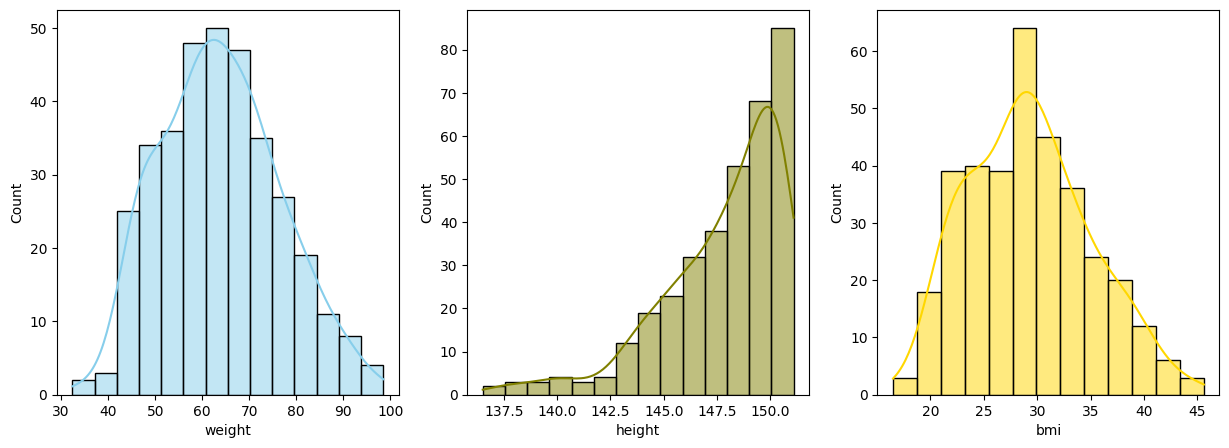

In [23]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

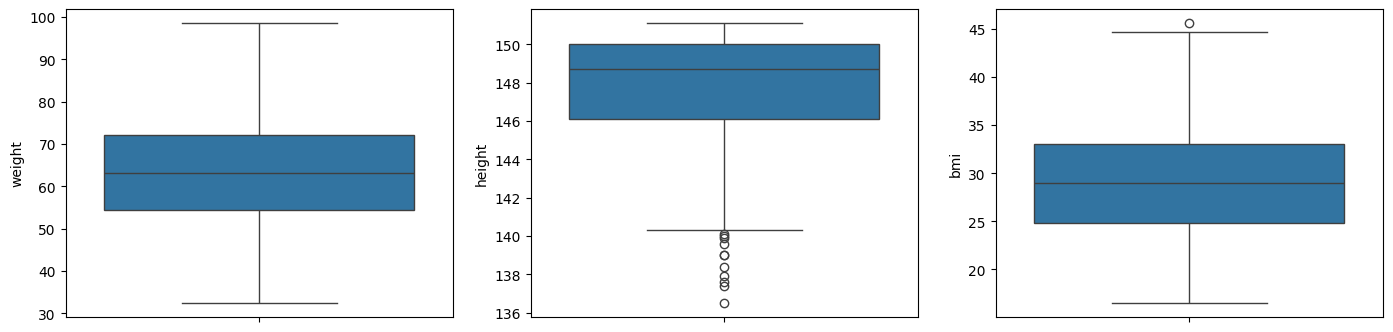

In [24]:
fig, axs = plt.subplots(1,3, figsize=(17, 4))

sns.boxplot(data['weight'], ax = axs[0])
sns.boxplot(data['height'], ax = axs[1])
sns.boxplot(data['bmi'], ax = axs[2])

plt.show()

In [25]:
data['smoking'] = data['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

#gender
data['gender'] = data.gender.replace({1 : 'male', 2 : 'female'})

#education
data['education'] = data.education.replace({1 : '<9th grade', 2 : '9-11th grade',
                                           3 : 'HS or GED', 4 : 'Some college / AA',
                                           5 : 'College or above', 7 : 'Other',
                                           8 : 'Other'})

In [26]:
categorical = data[['smoking','gender','education']]

categorical = categorical.reset_index()

categorical.head() 

,index,smoking,gender,education
0,5,no,female,9-11th grade
1,15,no,female,<9th grade
2,19,no,female,Some college / AA
3,21,no,female,HS or GED
4,27,yes,female,College or above


In [27]:
dummy = pd.get_dummies(categorical,drop_first=True)
dummy

,index,smoking_yes,gender_male,education_<9th grade,education_College or above,education_HS or GED,education_Some college / AA
0,5,False,False,False,False,False,False
1,15,False,False,True,False,False,False
2,19,False,False,False,False,False,True
3,21,False,False,False,False,True,False
4,27,True,False,False,True,False,False
...,...,...,...,...,...,...,...
344,5654,True,False,False,False,True,False
345,5689,False,False,False,False,False,False
346,5699,False,False,False,False,True,False
347,5719,True,False,True,False,False,False


In [28]:
numerical = data[['age', 'weight','height','bmi']]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

age      -0.224422
weight    0.259904
height   -1.341568
bmi       0.329213
dtype: float64

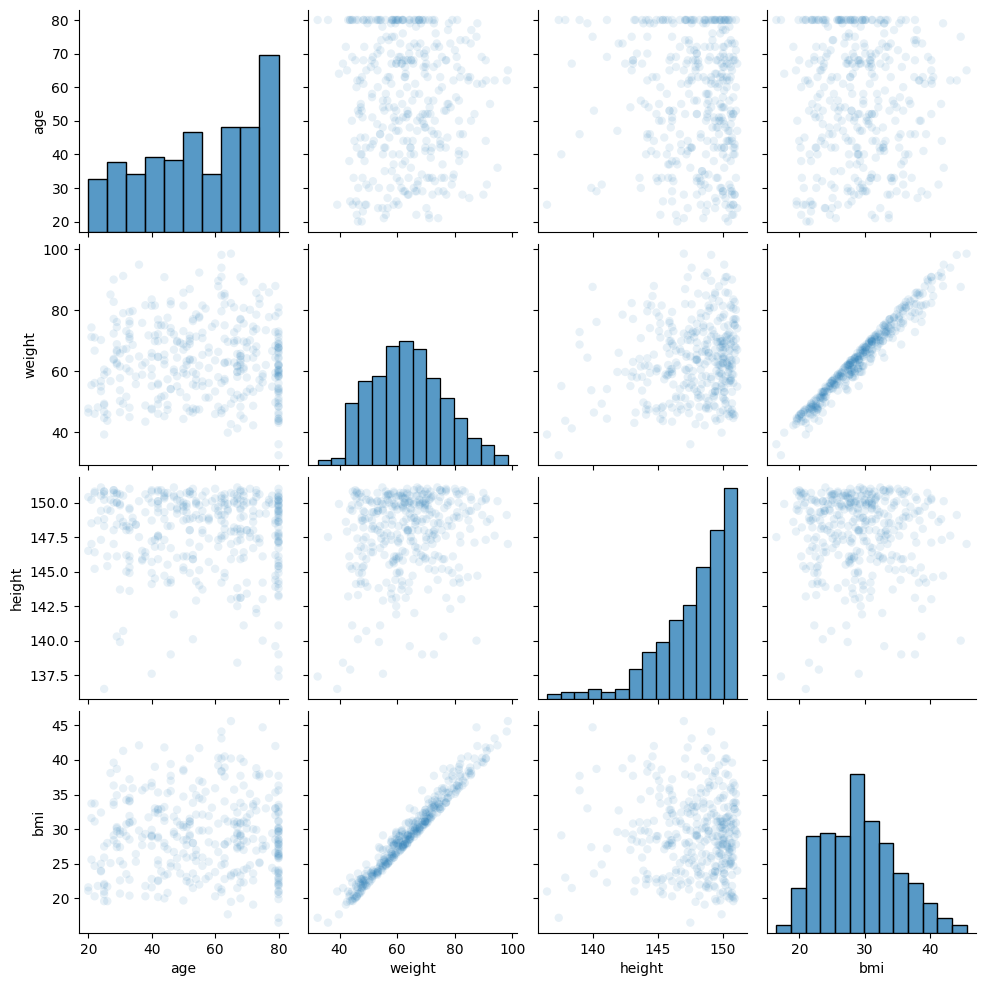

In [29]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
# Stratify the age
data['age'] = pd.cut(data.age, [18,30,40,50,60,70,80])

In [42]:
data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})
print(data_cat)
data_cat.columns = ['proportion','size']
data_cat

                   smoking     
                <lambda_0> size
age      gender                
(18, 30] female   0.095238   42
         male     0.333333    3
(30, 40] female   0.050000   40
         male     0.000000    1
(40, 50] female   0.153846   52
         male     0.000000    1
(50, 60] female   0.170213   47
         male     0.000000    3
(60, 70] female   0.208333   72
         male     0.000000    1
(70, 80] female   0.265060   83
         male     0.750000    4


proportion  size
age      gender                  
(18, 30] female    0.095238    42
         male      0.333333     3
(30, 40] female    0.050000    40
         male      0.000000     1
(40, 50] female    0.153846    52
         male      0.000000     1
(50, 60] female    0.170213    47
         male      0.000000     3
(60, 70] female    0.208333    72
         male      0.000000     1
(70, 80] female    0.265060    83
         male      0.750000     4

In [34]:
data_num = data[['gender','age','weight','height','bmi']]
data_num.groupby(['age','gender']).agg(['mean','std'])

weight                 height                  bmi  \
                      mean        std        mean       std       mean   
age      gender                                                          
(18, 30] female  61.085714  12.072961  148.514286  2.667837  27.738095   
         male    51.366667  10.622774  146.033333  8.256109  23.866667   
(30, 40] female  65.417500  12.819174  147.267500  2.792241  30.095000   
         male    76.400000        NaN  149.600000       NaN  34.100000   
(40, 50] female  65.325000  11.260914  148.098077  2.621816  29.838462   
         male    47.300000        NaN  150.700000       NaN  20.800000   
(50, 60] female  64.436170  11.543197  148.297872  2.260963  29.297872   
         male    55.233333   8.433465  145.900000  5.022947  25.800000   
(60, 70] female  66.272222  14.454077  147.859722  2.726844  30.290278   
         male    48.300000        NaN  149.400000       NaN  21.600000   
(70, 80] female  62.342169  12.349288  147.140964  3.224904  28.778313   
         male    57.875000   3.930543  150.000000  0.632456  25.700000   

                           
                      std  
age      gender            
(18, 30] female  5.621386  
         male    2.554082  
(30, 40] female  5.457855  
         male         NaN  
(40, 50] female  5.447977  
         male         NaN  
(50, 60] female  5.198599  
         male    2.487971  
(60, 70] female  6.477331  
         male         NaN  
(70, 80] female  5.647146  
         male    1.655295

In [36]:
pd.crosstab(data.gender, data.age)

age,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
gender,,,,,,
female,42,40,52,47,72,83
male,3,1,1,3,1,4


In [37]:
# 1. H01 = Female age 40-50 not obese
# 2. H02 = Proportion of male smoker is no difference than the proportion of female smoker.
# 3. H03 = BMI of male and female are similar.

In [39]:
mean_bmi = 30.174370
std_bmi = 6.717175
n_bmi = 476

In [43]:
# Standard Error of Mean
sem = mean_bmi/np.sqrt(n_bmi)

#t-value or z_score
t_value = (mean_bmi - 30) / sem 

print('sem:', sem.round(3), 't_value:', t_value.round(3))

sem: 1.383 t_value: 0.126


In [ ]:
#Result t_value = 0.13 p_value = 0.45

#Conclusion The p_value is 0.45 which is bigger then significance value of 0.05 so I can not reject the null hypothesis. 
#In other words, the female age 40-50 are not significantly obese and still considered as overweight.